In [5]:
import math
import random

# For visualiation
from PIL import Image, ImageDraw


In [6]:
def render(orig, im, grid_size=0):
    out = Image.new(mode='RGB', size=(orig.size[0]*2, orig.size[1]))
    d = ImageDraw.Draw(out)
    out.paste(orig, (0, 0))
    out.paste(im, (orig.size[0], 0))
    
    if grid_size > 0:
        x = 0
        while x < orig.size[0]:
            d.line((x, 0, x, orig.size[1]), fill=(255,0,0))
            x += grid_size
    
        y = 0
        while y < orig.size[1]:
            d.line((0, y, orig.size[0], y), fill=(255,0,0))
            y += grid_size
            
        x = 0
        while x < orig.size[0]:
            d.line((orig.size[0]+x, 0, orig.size[0]+x, orig.size[1]), fill=(0,0,255))
            x += grid_size
    
        y = 0
        while y < orig.size[1]:
            d.line((orig.size[0], y, orig.size[0] +orig.size[0], y), fill=(0,0,255))
            y += grid_size
    
    
    return out

In [21]:
orig = Image.open('image2.jpg')
paths = []
#orig = Image.open('NH.png')

im =  Image.new(mode="RGB", size=orig.size)

d = ImageDraw.Draw(im)
ImageDraw.floodfill(im,(0,0),(255,255,255))

In [28]:

# pick a point
grid_size = 15

position = (300,100)
path = [position]

for p in range(1000):
    # current cell
    # FIXME: worry about edges?!
    cell_position = (position[0]//grid_size, position[1]//grid_size)
    #print("In cell: %s " % (cell_position,))
    old_cells = [[ 0, 0 ,0 ], [ 0, 0 ,0 ], [ 0, 0 ,0 ]]
    new_cells = [[ 0, 0 ,0 ], [ 0, 0 ,0 ], [ 0, 0 ,0 ]]
    for i in (-1,0,1):
        for j in (-1, 0, 1):
            # inspecting:
            target_cell = (cell_position[0] + i, cell_position[1] + j)
            #print('looking at cell: %s' % (target_cell,))
            
            #d.line((target_cell[0]* grid_size, target_cell[1]* grid_size, (1+target_cell[0])* grid_size, (1+target_cell[1])* grid_size), fill=(0,0,0)) 
            #d.rectangle((target_cell[0]* grid_size, target_cell[1]* grid_size, (1+target_cell[0])* grid_size, (1+target_cell[1])* grid_size), fill=(0,0,0)) 
            old_value =0
            new_value = 0
            for in_x in range(grid_size):
                for in_y in range(grid_size):
                    
                        
                    target_pixel = (grid_size * target_cell[0] + in_x, grid_size * target_cell[1] + in_y)
                    if 0 <= target_pixel[0] < orig.size[0] and 0 <= target_pixel[1] < orig.size[1]:
                        old_value += orig.getpixel(target_pixel)[0]
                        new_value += im.getpixel(target_pixel)[0]
                    
            old_cells[1+j][1+i] = old_value // (grid_size**2) 
            new_cells[1+j][1+i] = new_value // (grid_size**2) 
            
            #print("   target %s currently %s" % (old_cells[1+j][1+i],new_cells[1+j][1+i] ) )
            
    # now pick somewhere in the region of cell_position-1 to cell_position + 1
    # but weight the randomness - so firstly lets normalise the cells
    target_cells = [[ 0, 0 ,0 ], [ 0, 0 ,0 ], [ 0, 0 ,0 ]]
    for i in range(3):
        for j in range(3):
            target_cells[j][i] =  (255- old_cells[j][i]) - (3* (255-new_cells[j][i]))
    
    #print("Orig  Cells: %s" % old_cells)
    #print("New   Cells: %s" % new_cells)
    #print("Calcu Cells: %s" % target_cells)
    
    # this is memory hog
    options = []
    for i in range(3):
        for j in range(3):
            for t in range(target_cells[j][i]):
                options.append((cell_position[0] + i-1, cell_position[1] + j-1))
    #break
                
    #print("Options count %s" % len(options))
    if len(options) > 0:
        next_cell = random.choice(options)
        next_x = random.randrange(next_cell[0] * grid_size, (next_cell[0]+1) * grid_size)
        next_y = random.randrange(next_cell[1] * grid_size, (next_cell[1]+1) * grid_size)
        
        next_position = (next_x, next_y)
        #print(next_position)
        path.append(next_position)
        d.line((position, next_position), fill=(0,0,0))
        position = next_position
        #print("-----")
    else:
        print("Ran out of path?")
        break
paths.append(path)

Ran out of path?


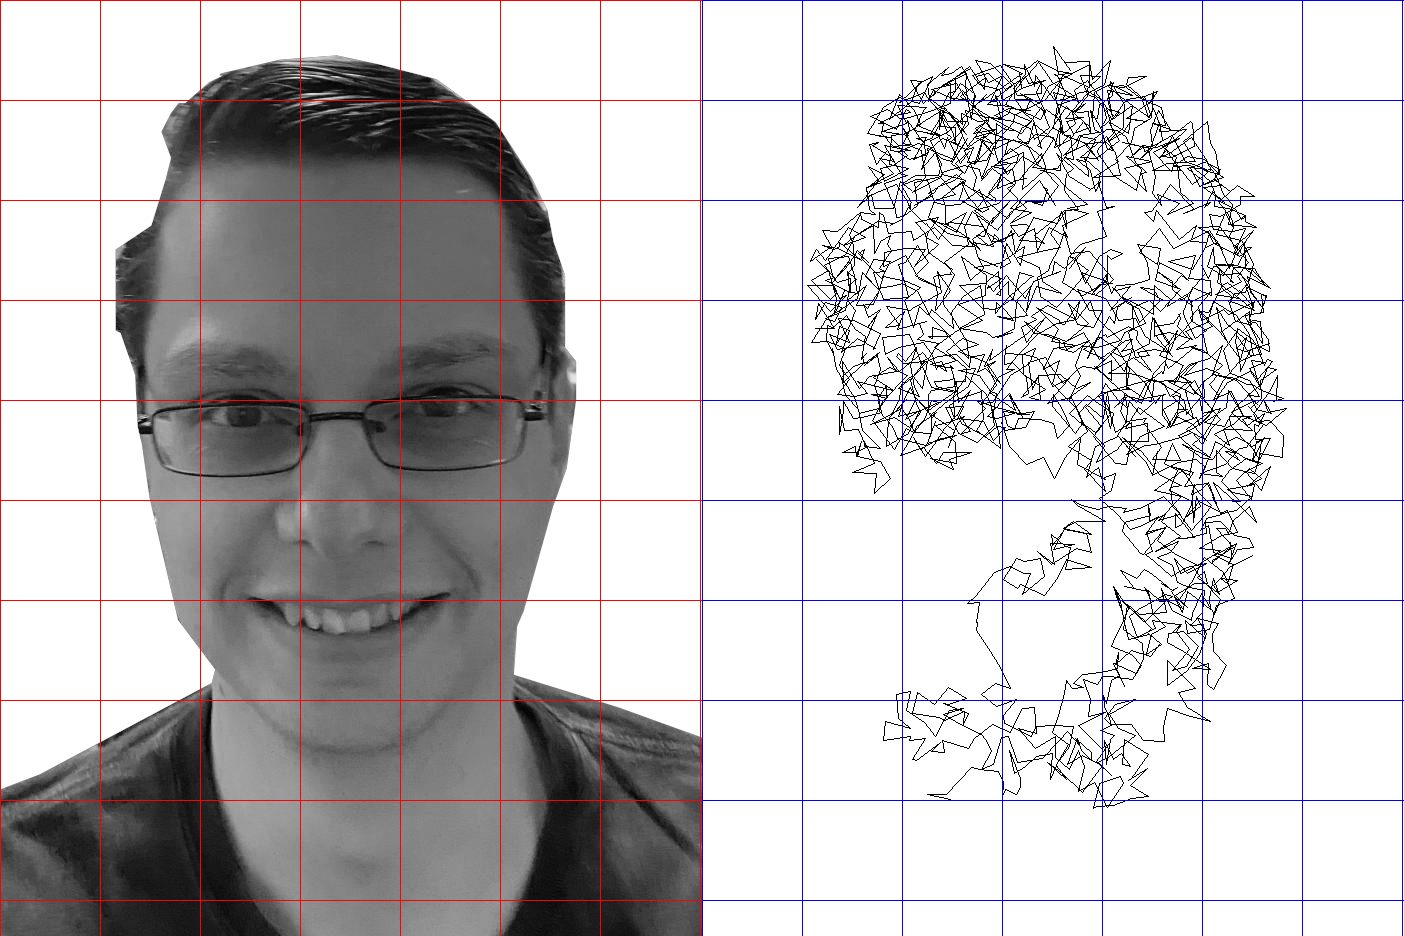

In [30]:
grid_size = 100
render(orig,im, grid_size=grid_size)

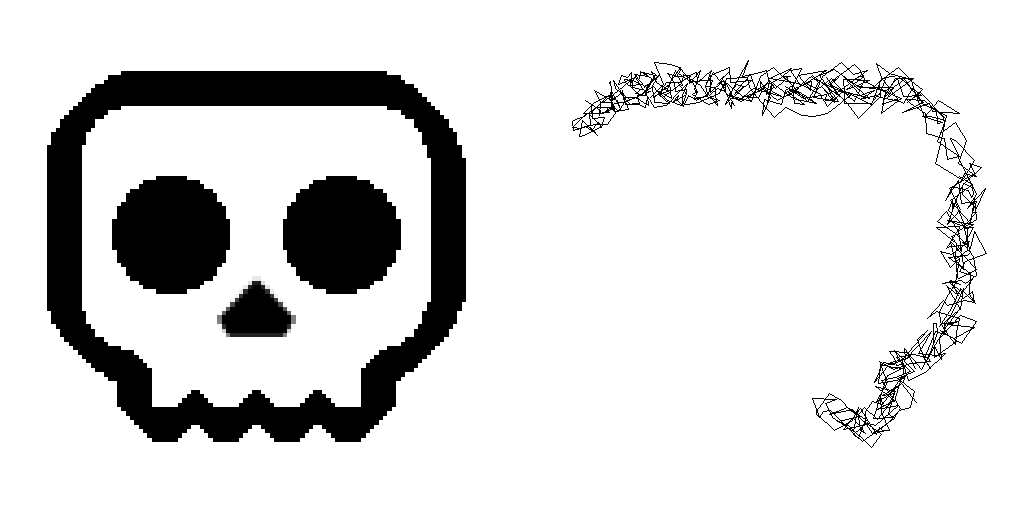

In [20]:
render(orig,im)

In [139]:
i = 0
for p in paths:
    print("%s : %s " % (i, len(p)))
    i += 1


0 : 584 
1 : 1001 
2 : 672 
3 : 285 
4 : 346 
5 : 895 
6 : 142 
7 : 140 
8 : 186 
9 : 114 
10 : 34 


In [138]:
del(paths[11])

IndexError: list assignment index out of range

In [137]:
orig.size

(502, 502)

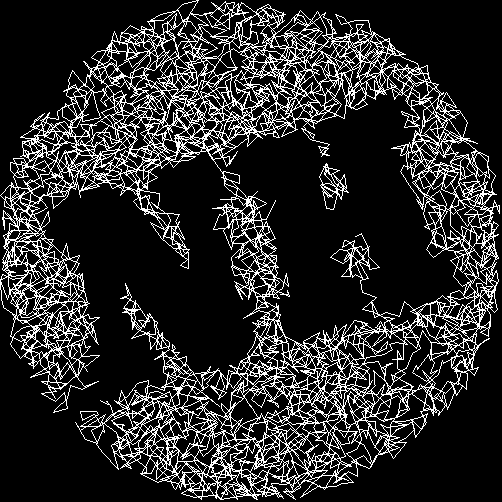

In [145]:
out_two = Image.new(mode='RGB', size=(orig.size[0], orig.size[1]))
drawer  = ImageDraw.Draw(out_two)
for p in paths:
    last_coord = p[0]
    for coord in p[1:]:
        drawer.line((last_coord, coord), fill=(255,255,255))
        last_coord = coord
out_two

In [146]:
import json

with open("NH.json", "w") as fp:
    json.dump(paths,fp)


In [ ]:
xy_path = [
    # J
    (300, 200),
    (350, 200),
    (325, 200),
    (325, 250),
    (312, 260),
    (300, 250),
    
    # M
    (355, 250),
    (355, 200),
    (375, 225),
    (390, 200),
    (390, 250),
    
    # O
    (415, 250),
      (405, 240),
    (400, 225),
      (405, 210),
    (415, 200),
      (425, 210),
    (430, 225),
      (425, 240),
    (415, 250),
    
    # N
    (435, 250),
    (435, 200),
    (465, 250),
    (465, 200),
    
    # S
    (500, 200),
    
    (470, 200),
    (470, 225),
    
    (500, 225),
    (500, 250),
    (470, 250),
    
    "HOME"
]